In [1]:
!pip install openml
import openml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.9 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.1-py3-none-any.whl size=146923 sha256=3bead6c27016166f9084ac9e4ea823177fb44d63c426d794ad58761ee147745f
  Stored in directory: /root/.cache/pip/wheels/75/bc/fd/739778254a2881ef96b139d0aaf60c6d4f9130bb1459b48f10
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=560239f690ce4e05573f9ebd4d02d8d252afb9ef5fce33d74ddb794d53811b53
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built openml liac-arff


In [2]:
!pip install smac

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 3.3 MB/s eta 0:00:00
  Created wheel for smac: filename=smac-2.0.2-py3-none-any.whl size=207413 sha256=fb524c824508a54d387f6b939866f0ce95e8566268d1b577c31e78007df8da0c
  Stored in directory: /root/.cache/pip/wheels/9e/7b/0f/70fa663d850965f42f74fd6ed340a48de9e0f88526e4c57fa4
  Created wheel for pynisher: fil

In [3]:
# wczytanie potrzebnych pakietów
import copy
import openml
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from sklearn.svm import SVC

from ConfigSpace import Configuration, ConfigurationSpace
from smac import RunHistory, HyperparameterOptimizationFacade, Scenario

#Wczytanie zbiorów danych


In [4]:
# Pierwszy zbiór danych
dataset1 = openml.datasets.get_dataset(45068, download_data=False)

X1, y1, _, _ = dataset1.get_data(dataset_format="dataframe", target='class')

#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=2023)

# Drugi zbiór danych
dataset2 = openml.datasets.get_dataset(846, download_data=False)

X2, y2, _, _ = dataset2.get_data(dataset_format="dataframe", target='binaryClass')

#X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=2023)

# Trzeci zbiór danych
dataset3 = openml.datasets.get_dataset(1471, download_data=False)

X3, y3, _, _ = dataset3.get_data(dataset_format="dataframe", target='Class')

#X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=2023)

# Czwarty zbiór danych
dataset4 = openml.datasets.get_dataset(1489, download_data=False)

X4, y4, _, _ = dataset4.get_data(dataset_format="dataframe", target='Class')

#X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=2023)

/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Start

In [5]:
### operacje dla kolumn numerycznych
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer()),
    ('scale',MinMaxScaler())
])

# operacje dla kolumn kategorycznych
cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer()),
    ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse=False))
])

col_trans = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, make_column_selector( dtype_include= np.number)),
    ('cat_pipeline',cat_pipeline,make_column_selector( dtype_include= np.object_))
    ],
    remainder='drop',
    n_jobs=-1)



In [6]:
X1_trans = col_trans.fit_transform(X1)
X2_trans = col_trans.fit_transform(X2)
X3_trans = col_trans.fit_transform(X3)
X4_trans = col_trans.fit_transform(X4)

# RandomSearchCV

## Drzewo klasyfikacyjne

In [7]:
grid_tree = {
    "model__max_depth": np.arange(1, 30, 1), #maxdepth
    "model__min_samples_split": np.arange(2, 60, 1), #minsplit
    "model__min_samples_leaf": np.arange(1, 60, 1), #minbucket
    "model__ccp_alpha": np.arange(0.0, 1.0, 0.01) #cp
               }

tree_pipeline = Pipeline([('preprocessing', col_trans),
                           ('model', DecisionTreeClassifier())])

rs_tree = RandomizedSearchCV(tree_pipeline,
                               grid_tree,
                               scoring='roc_auc',
                               cv=5,
                               random_state = 2023,
                               n_iter = 50,
                               n_jobs=-1)


In [8]:
#dane 1
gs_tree_res1 = rs_tree.fit(X1, y1).cv_results_

#dane 2
gs_tree_res2 = rs_tree.fit(X2, y2).cv_results_

#dane 3
gs_tree_res3 = rs_tree.fit(X3, y3).cv_results_

#dane 4
gs_tree_res4 = rs_tree.fit(X4, y4).cv_results_

In [9]:
# średnie wyniki na każdym zbiorze
scores1 = gs_tree_res1['mean_test_score']
scores2 = gs_tree_res2['mean_test_score']
scores3 = gs_tree_res3['mean_test_score']
scores4 = gs_tree_res4['mean_test_score']

In [10]:
# eksport wynikow do excela
tuning_history_rs_tree = pd.DataFrame({'wektor parametrów': gs_tree_res1['params'],
              "mean_score_dane1": scores1,
              "mean_score_dane2": scores2,
              "mean_score_dane3": scores3,
              "mean_score_dane4": scores4,})
tuning_history_rs_tree.to_csv('tuning_history_rs_tree.csv', index=True)

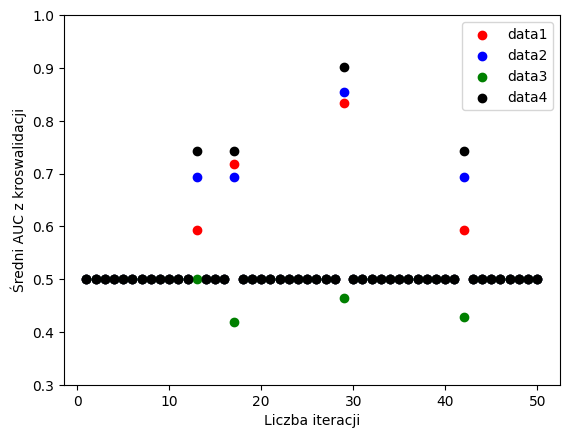

In [11]:
n_iter = np.arange(1,51,1)
plt.scatter(n_iter, scores1, color='red', label='data1')
plt.scatter(n_iter, scores2, color='blue', label='data2')
plt.scatter(n_iter, scores3, color='green', label='data3')
plt.scatter(n_iter, scores4, color='black', label='data4')
plt.ylim([0.3,1])
plt.legend()
plt.xlabel("Liczba iteracji")
plt.ylabel("Średni AUC z kroswalidacji")
plt.show()

Wybieramy najlepsze parametry

In [12]:
params_list = gs_tree_res1['params']
mean_scores = np.nan_to_num((scores1 + scores2 + scores3 + scores4)/4, 0)

In [13]:
optimal_score_tree = mean_scores[mean_scores.argmax()]
optimal_params_tree = params_list[mean_scores.argmax()]

In [14]:
optimal_params_tree

{'model__min_samples_split': 28,
 'model__min_samples_leaf': 20,
 'model__max_depth': 18,
 'model__ccp_alpha': 0.0}

#Sprawdzenie tunowalności modelu

Tunowalność dla wszystkich sprawdzanych wektorów parametrów (na podstawie historii tuningu)

In [15]:
# wyniki każdego zbioru danych przy optymalnych parametrach
optimal_score1_tree = gs_tree_res1['mean_test_score'][mean_scores.argmax()]
optimal_score2_tree = gs_tree_res2['mean_test_score'][mean_scores.argmax()]
optimal_score3_tree = gs_tree_res3['mean_test_score'][mean_scores.argmax()]
optimal_score4_tree = gs_tree_res4['mean_test_score'][mean_scores.argmax()]

In [16]:
# tunability dla wszystkich sprawdzanych wektorów parametrów
tunability1 = gs_tree_res1['mean_test_score'] - optimal_score1_tree
tunability2 = gs_tree_res2['mean_test_score'] - optimal_score2_tree
tunability3 = gs_tree_res3['mean_test_score'] - optimal_score3_tree
tunability4 = gs_tree_res4['mean_test_score'] - optimal_score4_tree

In [17]:
def array_dropna(x):
  x = x[~np.isnan(x)]
  return x

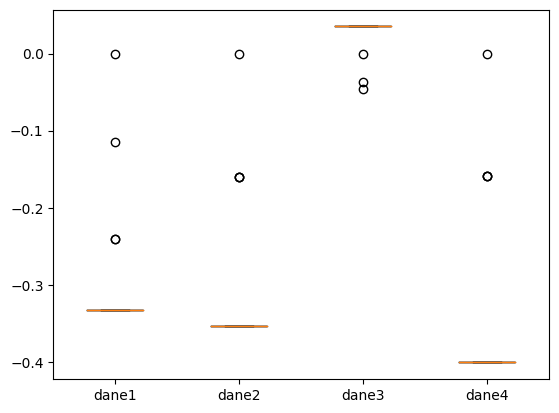

In [18]:
plt.boxplot([array_dropna(tunability1),
             array_dropna(tunability2),
             array_dropna(tunability3),
             array_dropna(tunability4
                          )],
            labels=['dane1', 'dane2', 'dane3', 'dane4'])
plt.show()

**Tunowalność algorytmów dla zbiorów danych:
różnica między najlepszym wynikiem na danym zbiorze a wynikiem z defaultowymi parametrami**

In [19]:
tun1 = max(scores1) - optimal_score1_tree
tun2 = max(scores2) - optimal_score2_tree
tun3 = max(scores3) - optimal_score3_tree
tun4 = max(scores4) - optimal_score4_tree

In [20]:
improv1 = (max(scores1) - optimal_score1_tree)/optimal_score1_tree
improv2 = (max(scores2) - optimal_score2_tree)/optimal_score2_tree
improv3 = (max(scores3) - optimal_score3_tree)/optimal_score3_tree
improv4 = (max(scores4) - optimal_score4_tree)/optimal_score4_tree

In [21]:
pd.DataFrame({"dataset": ['dane1', 'dane2', 'dane3', 'dane4'],
              "tunability measure": [tun1, tun2, tun3, tun4],
              "improvement": [improv1, improv2, improv3, improv4]})

,dataset,tunability measure,improvement
0,dane1,0.000000,0.000000
1,dane2,0.000000,0.000000
2,dane3,0.035163,0.075646
3,dane4,0.000000,0.000000


Na trzech wybranych zbiorach danych defaultowe parametry okazały się najlepszymi, tylko dla jednego zbioru możliwe było poprawienie wyniku poprzez tuning parametrów.


## Las losowy

In [22]:
grid_forest = {'model__n_estimators':np.arange(10,101,1), #num.trees
               'model__max_samples': np.arange(0.1, 1, 0.01), #sample.fraction
               'model__max_features': np.arange(0, 1, 0.01), #mtry
               'model__min_samples_leaf': np.arange(0.01,1,0.01), #min.node.size
               }

forest_pipeline = Pipeline([('preprocessing', col_trans),
                           ('model', RandomForestClassifier())])

rs_forest = RandomizedSearchCV(forest_pipeline,
                               grid_forest,
                               scoring='roc_auc',
                               cv=5,
                               random_state = 2023,
                               n_iter = 50,
                               n_jobs=-1)


In [23]:
#dane 1
gs_forest_res1 = rs_forest.fit(X1, y1).cv_results_

#dane 2
gs_forest_res2 = rs_forest.fit(X2, y2).cv_results_

#dane 3
gs_forest_res3 = rs_forest.fit(X3, y3).cv_results_

#dane 4
gs_forest_res4 = rs_forest.fit(X4, y4).cv_results_


In [24]:
# średnie wyniki na każdym zbiorze
scores1 = gs_forest_res1['mean_test_score']
scores2 = gs_forest_res2['mean_test_score']
scores3 = gs_forest_res3['mean_test_score']
scores4 = gs_forest_res4['mean_test_score']

In [25]:
# eksport wynikow do excela
tuning_history_rs_forest = pd.DataFrame({'wektor parametrów': gs_forest_res1['params'],
              "mean_score_dane1": scores1,
              "mean_score_dane2": scores2,
              "mean_score_dane3": scores3,
              "mean_score_dane4": scores4,})
tuning_history_rs_forest.to_csv('tuning_history_rs_forest.csv', index=True)

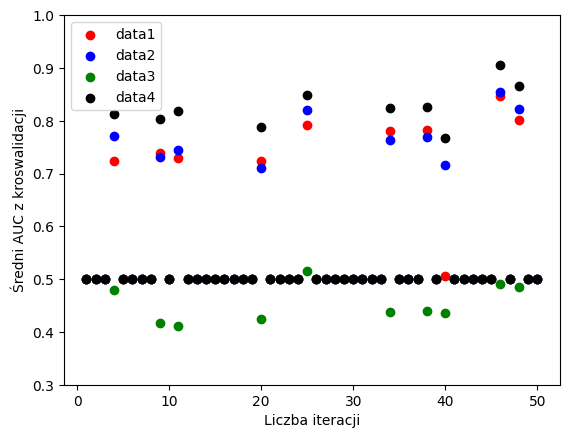

In [26]:
n_iter = np.arange(1,51,1)
plt.scatter(n_iter, scores1, color='red', label='data1')
plt.scatter(n_iter, scores2, color='blue', label='data2')
plt.scatter(n_iter, scores3, color='green', label='data3')
plt.scatter(n_iter, scores4, color='black', label='data4')
plt.ylim([0.3,1])
plt.legend()
plt.xlabel("Liczba iteracji")
plt.ylabel("Średni AUC z kroswalidacji")
plt.show()

Wybieramy najlepsze parametry

In [27]:
params_list = gs_forest_res1['params']
mean_scores = np.nan_to_num((scores1 + scores2 + scores3 + scores4)/4, 0)

In [28]:
optimal_score_forest = mean_scores[mean_scores.argmax()]
optimal_params_forest = params_list[mean_scores.argmax()]

In [29]:
optimal_params_forest

{'model__n_estimators': 16,
 'model__min_samples_leaf': 0.01,
 'model__max_samples': 0.5899999999999997,
 'model__max_features': 0.62}

#Sprawdzanie tunowalności modelu

In [30]:
# wyniki każdego zbioru danych przy optymalnych parametrach
optimal_score1_forest = gs_forest_res1['mean_test_score'][mean_scores.argmax()]
optimal_score2_forest = gs_forest_res2['mean_test_score'][mean_scores.argmax()]
optimal_score3_forest = gs_forest_res3['mean_test_score'][mean_scores.argmax()]
optimal_score4_forest = gs_forest_res4['mean_test_score'][mean_scores.argmax()]

In [31]:
tunability1 = gs_forest_res1['mean_test_score'] - optimal_score1_forest
tunability2 = gs_forest_res2['mean_test_score'] - optimal_score2_forest
tunability3 = gs_forest_res3['mean_test_score'] - optimal_score3_forest
tunability4 = gs_forest_res4['mean_test_score'] - optimal_score4_forest

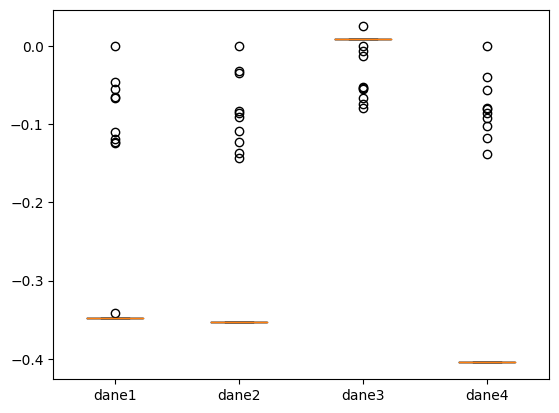

In [32]:
plt.boxplot([array_dropna(tunability1),
             array_dropna(tunability2),
             array_dropna(tunability3),
             array_dropna(tunability4
                          )],
            labels=['dane1', 'dane2', 'dane3', 'dane4'])
plt.show()

**Tunowalność algorytmów dla zbiorów danych:
różnica między najlepszym wynikiem na danym zbiorze a wynikiem z defaultowymi parametrami**

In [33]:
tun1 = max(scores1) - optimal_score1_forest
tun2 = max(scores2) - optimal_score2_forest
tun3 = max(scores3) - optimal_score3_forest
tun4 = max(scores4) - optimal_score4_forest

In [34]:
improv1 = (max(scores1) - optimal_score1_forest)/optimal_score1_forest
improv2 = (max(scores2) - optimal_score2_forest)/optimal_score2_forest
improv3 = (max(scores3) - optimal_score3_forest)/optimal_score3_forest
improv4 = (max(scores4) - optimal_score4_forest)/optimal_score4_forest

In [35]:
pd.DataFrame({"dataset": ['dane1', 'dane2', 'dane3', 'dane4'],
              "tunability measure": [tun1, tun2, tun3, tun4],
              "improvement": [improv1, improv2, improv3, improv4]})

,dataset,tunability measure,improvement
0,dane1,0.000000,0.00000
1,dane2,0.000000,0.00000
2,dane3,0.025103,0.05111
3,dane4,0.000000,0.00000


Ponownie poprawa wyników następuje tylko na zbiorze trzecim.

## **SVM**

In [36]:
grid_svm = {'model__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
               'model__C': np.power(2, np.arange(-10,10,1, dtype=float)),
               'model__gamma': np.power(2, np.arange(-10,10,1, dtype=float)),
               'model__degree': [2,3,4,5],
               'model__max_iter':[100]
               }

svm_pipeline = Pipeline([('preprocessing', col_trans),
                           ('model', SVC())])

rs_svm = RandomizedSearchCV(svm_pipeline,
                               grid_svm,
                               scoring='roc_auc',
                               cv=5,
                               random_state = 2023,
                               n_iter = 50,
                               n_jobs=-1)


In [37]:
#dane 1
gs_svm_res1 = rs_svm.fit(X1, y1).cv_results_

#dane 2
gs_svm_res2 = rs_svm.fit(X2, y2).cv_results_

#dane 3
gs_svm_res3 = rs_svm.fit(X3, y3).cv_results_

#dane 4
gs_svm_res4 = rs_svm.fit(X4, y4).cv_results_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 217, in fit
    raise ValueError(
ValueError: Precomputed matrix must be a square matrix. I

In [38]:
# średnie wyniki na każdym zbiorze
scores1 = gs_svm_res1['mean_test_score']
scores2 = gs_svm_res2['mean_test_score']
scores3 = gs_svm_res3['mean_test_score']
scores4 = gs_svm_res4['mean_test_score']

In [39]:
# eksport wynikow do excela
tuning_history_rs_svm = pd.DataFrame({'wektor parametrów': gs_svm_res1['params'],
              "mean_score_dane1": scores1,
              "mean_score_dane2": scores2,
              "mean_score_dane3": scores3,
              "mean_score_dane4": scores4,})
tuning_history_rs_svm.to_csv('tuning_history_rs_svm.csv', index=True)

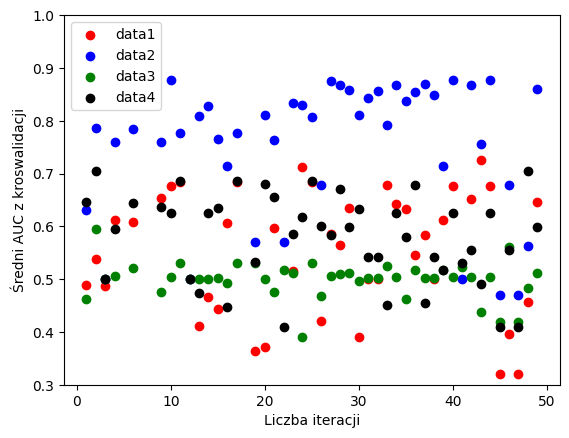

In [40]:
n_iter = np.arange(1,51,1)
plt.scatter(n_iter, scores1, color='red', label='data1')
plt.scatter(n_iter, scores2, color='blue', label='data2')
plt.scatter(n_iter, scores3, color='green', label='data3')
plt.scatter(n_iter, scores4, color='black', label='data4')
plt.ylim([0.3,1])
plt.legend()
plt.xlabel("Liczba iteracji")
plt.ylabel("Średni AUC z kroswalidacji")
plt.show()

Wybieramy najlepsze parametry

In [41]:
params_list = gs_svm_res1['params']
mean_scores = np.nan_to_num((scores1 + scores2 + scores3 + scores4)/4, 0)

In [42]:
optimal_score_svm = mean_scores[mean_scores.argmax()]
optimal_params_svm = params_list[mean_scores.argmax()]

In [43]:
optimal_params_svm

{'model__max_iter': 100,
 'model__kernel': 'rbf',
 'model__gamma': 2.0,
 'model__degree': 4,
 'model__C': 0.03125}

#Sprawdzanie tunowalności modelu

In [44]:
# wyniki każdego zbioru danych przy optymalnych parametrach
optimal_score1_svm = gs_svm_res1['mean_test_score'][mean_scores.argmax()]
optimal_score2_svm = gs_svm_res2['mean_test_score'][mean_scores.argmax()]
optimal_score3_svm = gs_svm_res3['mean_test_score'][mean_scores.argmax()]
optimal_score4_svm = gs_svm_res4['mean_test_score'][mean_scores.argmax()]

In [45]:
tunability1 = gs_svm_res1['mean_test_score'] - optimal_score1_svm
tunability2 = gs_svm_res2['mean_test_score'] - optimal_score2_svm
tunability3 = gs_svm_res3['mean_test_score'] - optimal_score3_svm
tunability4 = gs_svm_res4['mean_test_score'] - optimal_score4_svm

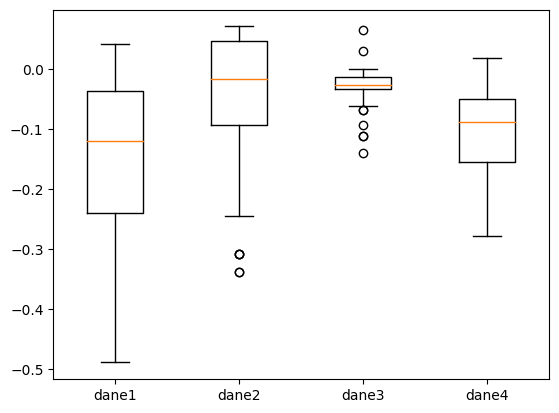

In [46]:
plt.boxplot([array_dropna(tunability1),
             array_dropna(tunability2),
             array_dropna(tunability3),
             array_dropna(tunability4
                          )],
            labels=['dane1', 'dane2', 'dane3', 'dane4'])
plt.show()

**Tunowalność algorytmów dla zbiorów danych:
różnica między najlepszym wynikiem na danym zbiorze a wynikiem z defaultowymi parametrami**

In [47]:
tun1 = max(scores1) - optimal_score1_svm
tun2 = max(scores2) - optimal_score2_svm
tun3 = max(scores3) - optimal_score3_svm
tun4 = max(scores4) - optimal_score4_svm

In [48]:
improv1 = (max(scores1) - optimal_score1_svm)/optimal_score1_svm
improv2 = (max(scores2) - optimal_score2_svm)/optimal_score2_svm
improv3 = (max(scores3) - optimal_score3_svm)/optimal_score3_svm
improv4 = (max(scores4) - optimal_score4_svm)/optimal_score4_svm

In [49]:
pd.DataFrame({"dataset": ['dane1', 'dane2', 'dane3', 'dane4'],
              "tunability measure": [tun1, tun2, tun3, tun4],
              "improvement": [improv1, improv2, improv3, improv4]})

,dataset,tunability measure,improvement
0,dane1,0.041555,0.060735
1,dane2,0.070335,0.087078
2,dane3,0.064999,0.122500
3,dane4,0.017997,0.026210


Ponownie poprawa wyników następuje tylko na zbiorze trzecim.

# Optymalizacja bayesowska

## Drzewo klasyfikacyjne

In [145]:
tree_param = ConfigurationSpace({
    "max_depth": (1,30), #maxdepth
    "min_samples_split": (2, 60), #minsplit
    "min_samples_leaf": (1, 60), #minbucket
    "ccp_alpha": (0.0, 1.0) #cp
})

In [146]:
# funkcja do optymalizacji na jednym zbiorze danych
def train_tree(config: Configuration, datax, datay, seed: int = 2023) -> float:

    classifier = DecisionTreeClassifier(max_depth=config["max_depth"],
                                        min_samples_split = config["min_samples_split"],
                                        min_samples_leaf = config["min_samples_leaf"],
                                        ccp_alpha=config["ccp_alpha"],
                                        random_state=seed)

    cv_results = cross_validate(classifier,
                                datax,
                                datay,
                                scoring='roc_auc',
                                cv=5,
                                error_score='raise')

    scores = np.mean(cv_results["test_score"])

    return 1 - np.mean(scores)

In [147]:
def train_tree1(config: Configuration, seed: int = 2023) -> float:
    return train_tree(config, datax=X1_trans, datay=y1)

def train_tree2(config: Configuration, seed: int = 2023) -> float:
    return train_tree(config, datax=X2_trans, datay=y2)

def train_tree3(config: Configuration, seed: int = 2023) -> float:
    return train_tree(config, datax=X3_trans, datay=y3)

def train_tree4(config: Configuration, seed: int = 2023) -> float:
    return train_tree(config, datax=X4_trans, datay=y4)

In [148]:
# Scenario object specifying the optimization environment
scenario = Scenario(configspace=tree_param,
                    deterministic=True,
                    n_trials=50,
                    seed=2023
                    )

#### Szukamy najlepszych parametrów na każdym zbiorze danych

In [149]:
smac1 = HyperparameterOptimizationFacade(scenario, train_tree1, overwrite=True)
optimal_config1 = smac1.optimize()

smac2 = HyperparameterOptimizationFacade(scenario, train_tree2, overwrite=True)
optimal_config2 = smac2.optimize()

smac3 = HyperparameterOptimizationFacade(scenario, train_tree3, overwrite=True)
optimal_config3 = smac3.optimize()

smac4 = HyperparameterOptimizationFacade(scenario, train_tree4, overwrite=True)
optimal_config4 = smac4.optimize()

[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 40 to 12 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 12 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:515] Added config 615143 as new incumbent because there are no incumbents yet.
[INFO][abstract_intensifier.py:590] Added config d29a8c and rejected config 615143 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][abstract_intensifier.py:590] Added config 3f2534 and rejected config d29a8c as incumbent because it is not better than the incumbents on 1 instances:
[INFO][abstract_intensifier.py:590] Added config 2f192d and rejected config 3f2534 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][abstract_intensifier.py:590] Added config 1d7bfe and rejected config 2f192d as incumbent because i

In [150]:
optimal_config1

Configuration(values={
  'ccp_alpha': 0.00011944964565183092,
  'max_depth': 30,
  'min_samples_leaf': 42,
  'min_samples_split': 56,
})

In [151]:
# wyniki najlepszych parametrów na kazdym zbiorze danych
score1 = 1-smac1.validate(optimal_config1)
score2 = 1-smac2.validate(optimal_config2)
score3 = 1-smac3.validate(optimal_config3)
score4 = 1-smac4.validate(optimal_config4)

[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


In [152]:
# tunowalność algorytmu jako różnica między najlepszym wynikiem na zbiorze a wynikiem z defaultowymi parametrami
tun1 = optimal_score1_tree - score1
tun2 = optimal_score2_tree - score2
tun3 = optimal_score3_tree - score3
tun4 = optimal_score4_tree - score4

In [153]:
improv1 = (optimal_score1_tree - score1)/score1
improv2 = (optimal_score2_tree - score2)/score2
improv3 = (optimal_score3_tree - score3)/score3
improv4 = (optimal_score4_tree - score4)/score4

In [154]:
pd.DataFrame({"dataset": ['dane1', 'dane2', 'dane3', 'dane4'],
              "tunability measure": [tun1, tun2, tun3, tun4],
              "improvement": [improv1, improv2, improv3, improv4]})

,dataset,tunability measure,improvement
0,dane1,-0.020294,-0.023778
1,dane2,0.002124,0.002494
2,dane3,-0.035163,-0.070326
3,dane4,0.011082,0.012455


#### Tunability

Porównujemy wyniki defaultowych parametrów wybranych na podstawie RandomSearchCV z wynikami otrzymywanymi w procesie tuningu.

In [155]:
scores1 = []
configs1 = []
for config in smac1.runhistory.get_configs():
    scores1.append(1-smac1.runhistory.average_cost(config))
    configs1.append(str(dict(config)))

scores2 = []
configs2 = []
for config in smac2.runhistory.get_configs():
    scores2.append(1-smac2.runhistory.average_cost(config))
    configs2.append(str(dict(config)))

scores3 = []
configs3 = []
for config in smac3.runhistory.get_configs():
    scores3.append(1-smac3.runhistory.average_cost(config))
    configs3.append(str(dict(config)))

scores4 = []
configs4 = []
for config in smac4.runhistory.get_configs():
    scores4.append(1-smac4.runhistory.average_cost(config))
    configs4.append(str(dict(config)))


In [156]:
# eksport wynikow do excela
tuning_history_bayes_tree = pd.DataFrame({'wektor parametrów 1': configs1,
              "mean_score_dane1": scores1,
              'wektor parametrów 1': configs2,
              "mean_score_dane2": scores2,
              'wektor parametrów 1': configs3,
              "mean_score_dane3": scores3,
              'wektor parametrów 1': configs4,
              "mean_score_dane4": scores4,})
tuning_history_bayes_tree.to_csv('tuning_history_bayes_tree.csv', index=True)

In [214]:
tunability1 = scores1 - optimal_score1_tree
tunability2 = scores2 - optimal_score2_tree
tunability3 = scores3 - optimal_score3_tree
tunability4 = scores4 - optimal_score4_tree

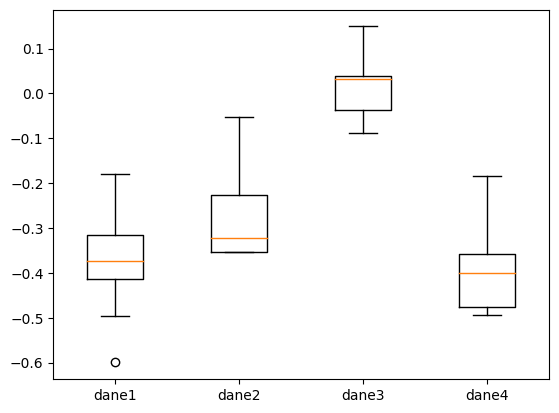

In [215]:
plt.boxplot([array_dropna(tunability1),
             array_dropna(tunability2),
             array_dropna(tunability3),
             array_dropna(tunability4
                          )],
            labels=['dane1', 'dane2', 'dane3', 'dane4'])
plt.show()

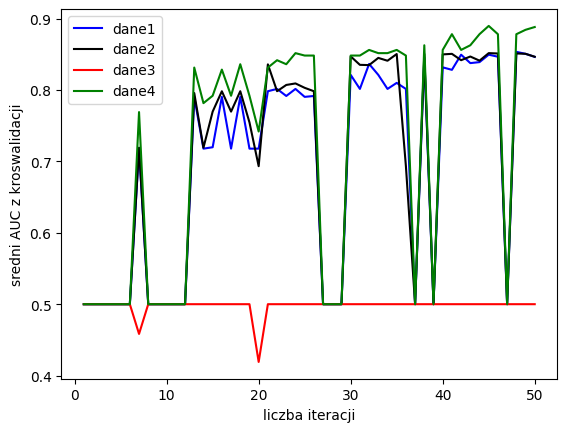

In [159]:
plt.plot(n_iter, scores1, color='blue', label='dane1')
plt.plot(n_iter, scores2, color='black', label='dane2')
plt.plot(n_iter, scores3, color='red', label='dane3')
plt.plot(n_iter, scores4, color='green', label='dane4')
plt.legend()
plt.xlabel("liczba iteracji")
plt.ylabel("sredni AUC z kroswalidacji")
plt.show()

## Las losowy

In [169]:
forest_param = ConfigurationSpace({'n_estimators':(1,200), #num.trees
               'max_samples': (0.1, 1.0), #sample.fraction
               'max_features': (0.0, 1.0), #mtry
               'min_samples_leaf': (0.0, 1.0), #min.node.size
               })

In [170]:
# funkcja do optymalizacji na jednym zbiorze danych
def train_forest(config: Configuration, datax, datay, seed: int = 2023) -> float:

    classifier = RandomForestClassifier(n_estimators=config["n_estimators"],
                                        max_samples = config["max_samples"],
                                        max_features = config["max_features"],
                                        min_samples_leaf=config["min_samples_leaf"],
                                        random_state=seed)

    cv_results = cross_validate(classifier,
                                datax,
                                datay,
                                scoring='roc_auc',
                                cv=5,
                                error_score='raise')

    scores = np.mean(cv_results["test_score"])

    return 1 - np.mean(scores)

In [171]:
def train_forest1(config: Configuration, seed: int = 2023) -> float:
    return train_forest(config, datax=X1_trans, datay=y1)

def train_forest2(config: Configuration, seed: int = 2023) -> float:
    return train_forest(config, datax=X2_trans, datay=y2)

def train_forest3(config: Configuration, seed: int = 2023) -> float:
    return train_forest(config, datax=X3_trans, datay=y3)

def train_forest4(config: Configuration, seed: int = 2023) -> float:
    return train_forest(config, datax=X4_trans, datay=y4)

In [172]:
# Scenario object specifying the optimization environment
scenario = Scenario(configspace=forest_param,
                    deterministic=True,
                    n_trials=50,
                    seed=2023
                    )

#### Szukamy najlepszych parametrów na każdym zbiorze danych

In [173]:
smac1 = HyperparameterOptimizationFacade(scenario, train_forest1, overwrite=True)
optimal_config1 = smac1.optimize()

smac2 = HyperparameterOptimizationFacade(scenario, train_forest2, overwrite=True)
optimal_config2 = smac2.optimize()

smac3 = HyperparameterOptimizationFacade(scenario, train_forest3, overwrite=True)
optimal_config3 = smac3.optimize()

smac4 = HyperparameterOptimizationFacade(scenario, train_forest4, overwrite=True)
optimal_config4 = smac4.optimize()

[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 40 to 12 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 12 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:515] Added config 1e1162 as new incumbent because there are no incumbents yet.
[INFO][abstract_intensifier.py:590] Added config cba301 and rejected config 1e1162 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][abstract_intensifier.py:590] Added config 1d0ace and rejected config cba301 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][abstract_intensifier.py:590] Added config 3ce9df and rejected config 1d0ace as incumbent because it is not better than the incumbents on 1 instances:
[INFO][abstract_intensifier.py:590] Added config e385ba and rejected config 3ce9df as incumbent because i

In [174]:
optimal_config1

Configuration(values={
  'max_features': 0.36566138390308195,
  'max_samples': 0.6276585467918535,
  'min_samples_leaf': 0.000330177793523255,
  'n_estimators': 94,
})

In [175]:
# wyniki najlepszych parametrów na kazdym zbiorze danych
score1 = 1-smac1.validate(optimal_config1)
score2 = 1-smac2.validate(optimal_config2)
score3 = 1-smac3.validate(optimal_config3)
score4 = 1-smac4.validate(optimal_config4)

[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


In [176]:
# tunowalność algorytmu jako różnica między najlepszym wynikiem na zbiorze a wynikiem z defaultowymi parametrami
tun1 = optimal_score1_forest - score1
tun2 = optimal_score2_forest - score2
tun3 = optimal_score3_forest - score3
tun4 = optimal_score4_forest - score4

In [177]:
improv1 = (optimal_score1_forest - score1)/score1
improv2 = (optimal_score2_forest - score2)/score2
improv3 = (optimal_score3_forest - score3)/score3
improv4 = (optimal_score4_forest - score4)/score4

In [178]:
pd.DataFrame({"dataset": ['dane1', 'dane2', 'dane3', 'dane4'],
              "tunability measure": [tun1, tun2, tun3, tun4],
              "improvement": [improv1, improv2, improv3, improv4]})

,dataset,tunability measure,improvement
0,dane1,-0.013031,-0.015142
1,dane2,-0.052707,-0.058159
2,dane3,-0.041659,-0.078187
3,dane4,-0.050758,-0.053120


#### Tunability

Porównujemy wyniki defaultowych parametrów wybranych na podstawie RandomSearchCV z wynikami otrzymywanymi w procesie tuningu.

In [179]:
scores1 = []
configs1 = []
for config in smac1.runhistory.get_configs():
    scores1.append(1-smac1.runhistory.average_cost(config))
    configs1.append(str(dict(config)))

scores2 = []
configs2 = []
for config in smac2.runhistory.get_configs():
    scores2.append(1-smac2.runhistory.average_cost(config))
    configs2.append(str(dict(config)))

scores3 = []
configs3 = []
for config in smac3.runhistory.get_configs():
    scores3.append(1-smac3.runhistory.average_cost(config))
    configs3.append(str(dict(config)))

scores4 = []
configs4 = []
for config in smac4.runhistory.get_configs():
    scores4.append(1-smac4.runhistory.average_cost(config))
    configs4.append(str(dict(config)))


In [180]:
# eksport wynikow do excela
tuning_history_bayes_forest = pd.DataFrame({'wektor parametrów 1': configs1,
              "mean_score_dane1": scores1,
              'wektor parametrów 1': configs2,
              "mean_score_dane2": scores2,
              'wektor parametrów 1': configs3,
              "mean_score_dane3": scores3,
              'wektor parametrów 1': configs4,
              "mean_score_dane4": scores4,})
tuning_history_bayes_forest.to_csv('tuning_history_bayes_forest.csv', index=True)

In [212]:
tunability1 = scores1 - optimal_score1_forest
tunability2 = scores2 - optimal_score2_forest
tunability3 = scores3 - optimal_score3_forest
tunability4 = scores4 - optimal_score4_forest

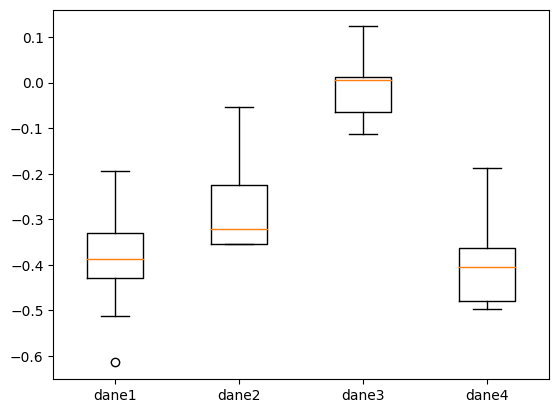

In [213]:
plt.boxplot([array_dropna(tunability1),
             array_dropna(tunability2),
             array_dropna(tunability3),
             array_dropna(tunability4
                          )],
            labels=['dane1', 'dane2', 'dane3', 'dane4'])
plt.show()

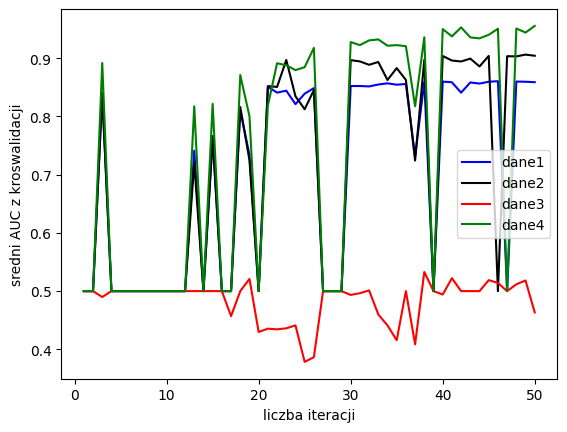

In [183]:
plt.plot(n_iter, scores1, color='blue', label='dane1')
plt.plot(n_iter, scores2, color='black', label='dane2')
plt.plot(n_iter, scores3, color='red', label='dane3')
plt.plot(n_iter, scores4, color='green', label='dane4')
plt.legend()
plt.xlabel("liczba iteracji")
plt.ylabel("sredni AUC z kroswalidacji")
plt.show()

## SVM

In [186]:
svm_param = ConfigurationSpace({
                'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
               'C': (0.001, 1000.0),
               'gamma': (0.001, 1000.0),
               'degree': [2,3,4,5]
               })

In [187]:
# funkcja do optymalizacji na jednym zbiorze danych
def train_svm(config: Configuration, datax, datay, seed: int = 2023) -> float:

    classifier = SVC(kernel=config["kernel"],
                                        C = config["C"],
                                        gamma = config["gamma"],
                                        degree=config["degree"],
                                        random_state=seed,
                                        max_iter=100)

    cv_results = cross_validate(classifier,
                                datax,
                                datay,
                                scoring='roc_auc',
                                cv=5,
                                error_score='raise')

    scores = np.mean(cv_results["test_score"])

    return 1 - np.mean(scores)

In [188]:
def train_svm1(config: Configuration, seed: int = 2023) -> float:
    return train_svm(config, datax=X1_trans, datay=y1)

def train_svm2(config: Configuration, seed: int = 2023) -> float:
    return train_svm(config, datax=X2_trans, datay=y2)

def train_svm3(config: Configuration, seed: int = 2023) -> float:
    return train_svm(config, datax=X3_trans, datay=y3)

def train_svm4(config: Configuration, seed: int = 2023) -> float:
    return train_svm(config, datax=X4_trans, datay=y4)

In [189]:
# Scenario object specifying the optimization environment
scenario = Scenario(configspace=svm_param,
                    deterministic=True,
                    n_trials=50,
                    seed=2023
                    )

#### Szukamy najlepszych parametrów na każdym zbiorze danych

In [190]:
smac1 = HyperparameterOptimizationFacade(scenario, train_svm1, overwrite=True)
optimal_config1 = smac1.optimize()

smac2 = HyperparameterOptimizationFacade(scenario, train_svm2, overwrite=True)
optimal_config2 = smac2.optimize()

smac3 = HyperparameterOptimizationFacade(scenario, train_svm3, overwrite=True)
optimal_config3 = smac3.optimize()

smac4 = HyperparameterOptimizationFacade(scenario, train_svm4, overwrite=True)
optimal_config4 = smac4.optimize()

[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 40 to 12 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 12 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[INFO][abstract_intensifier.py:515] Added config 3ae94f as new incumbent because there are no incumbents yet.
[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 2, in train_svm1
    return train_svm(config, datax=X1_trans, datay=y1)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    re

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[INFO][abstract_intensifier.py:590] Added config 7175fc and rejected config 3ae94f as incumbent because it is not better than the incumbents on 1 instances:


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[INFO][abstract_intensifier.py:590] Added config ad5e9a and rejected config 7175fc as incumbent because it is not better than the incumbents on 1 instances:


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[INFO][abstract_intensifier.py:590] Added config 10412d and rejected config ad5e9a as incumbent because it is not better than the incumbents on 1 instances:


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 2, in train_svm1
    return train_svm(config, datax=X1_trans, datay=y1)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __ca

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[INFO][abstract_intensifier.py:590] Added config b0ce56 and rejected config 10412d as incumbent because it is not better than the incumbents on 1 instances:


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 2, in train_svm1
    return train_svm(config, datax=X1_trans, datay=y1)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __ca

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 2, in train_svm1
    return train_svm(config, datax=X1_trans, datay=y1)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __ca

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 2, in train_svm1
    return train_svm(config, datax=X1_trans, datay=y1)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __ca

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 2, in train_svm1
    return train_svm(config, datax=X1_trans, datay=y1)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __ca

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 2, in train_svm1
    return train_svm(config, datax=X1_trans, datay=y1)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __ca

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 2, in train_svm1
    return train_svm(config, datax=X1_trans, datay=y1)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __ca

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[INFO][smbo.py:319] Finished 50 trials.
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 40 to 12 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 12 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[INFO][abstract_intensifier.py:515] Added config 3ae94f as new incumbent because there are no incumbents yet.
[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 5, in train_svm2
    return train_svm(config, datax=X2_trans, datay=y2)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    re

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[INFO][abstract_intensifier.py:590] Added config 7fe393 and rejected config 3ae94f as incumbent because it is not better than the incumbents on 1 instances:


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 5, in train_svm2
    return train_svm(config, datax=X2_trans, datay=y2)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __ca

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 5, in train_svm2
    return train_svm(config, datax=X2_trans, datay=y2)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __ca

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 5, in train_svm2
    return train_svm(config, datax=X2_trans, datay=y2)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __ca

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 5, in train_svm2
    return train_svm(config, datax=X2_trans, datay=y2)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __ca

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 5, in train_svm2
    return train_svm(config, datax=X2_trans, datay=y2)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __ca

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[INFO][abstract_intensifier.py:590] Added config cc8c32 and rejected config 7fe393 as incumbent because it is not better than the incumbents on 1 instances:
[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 5, in train_svm2
    return train_svm(config, datax=X2_trans, datay=y2)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_val

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[INFO][smbo.py:319] Finished 50 trials.
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 40 to 12 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 12 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[INFO][abstract_intensifier.py:515] Added config 3ae94f as new incumbent because there are no incumbents yet.
[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 8, in train_svm3
    return train_svm(config, datax=X3_trans, datay=y3)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    re

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 8, in train_svm3
    return train_svm(config, datax=X3_trans, datay=y3)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __ca

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 8, in train_svm3
    return train_svm(config, datax=X3_trans, datay=y3)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __ca

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 8, in train_svm3
    return train_svm(config, datax=X3_trans, datay=y3)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __ca

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 8, in train_svm3
    return train_svm(config, datax=X3_trans, datay=y3)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __ca

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 8, in train_svm3
    return train_svm(config, datax=X3_trans, datay=y3)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __ca

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[INFO][abstract_intensifier.py:590] Added config 9a044b and rejected config 3ae94f as incumbent because it is not better than the incumbents on 1 instances:


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 8, in train_svm3
    return train_svm(config, datax=X3_trans, datay=y3)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __ca

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[INFO][smbo.py:319] Finished 50 trials.
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 40 to 12 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 12 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:515] Added config 3ae94f as new incumbent because there are no incumbents yet.
[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd3

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[INFO][abstract_intensifier.py:590] Added config 7fe393 and rejected config 3ae94f as incumbent because it is not better than the incumbents on 1 instances:


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[INFO][abstract_intensifier.py:590] Added config 7175fc and rejected config 7fe393 as incumbent because it is not better than the incumbents on 1 instances:


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[INFO][abstract_intensifier.py:590] Added config ad5e9a and rejected config 7175fc as incumbent because it is not better than the incumbents on 1 instances:


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 11, in train_svm4
    return train_svm(config, datax=X4_trans, datay=y4)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __c

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 11, in train_svm4
    return train_svm(config, datax=X4_trans, datay=y4)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __c

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[INFO][abstract_intensifier.py:590] Added config 0ad502 and rejected config ad5e9a as incumbent because it is not better than the incumbents on 1 instances:


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 11, in train_svm4
    return train_svm(config, datax=X4_trans, datay=y4)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __c

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 11, in train_svm4
    return train_svm(config, datax=X4_trans, datay=y4)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __c

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 11, in train_svm4
    return train_svm(config, datax=X4_trans, datay=y4)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __c

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[INFO][abstract_intensifier.py:590] Added config 3d7cc7 and rejected config 0ad502 as incumbent because it is not better than the incumbents on 1 instances:


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[INFO][abstract_intensifier.py:590] Added config eb6883 and rejected config 3d7cc7 as incumbent because it is not better than the incumbents on 1 instances:


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[WARNING][abstract_runner.py:132] Target function returned infinity or nothing at all. Result is treated as CRASHED and cost is set to inf.
[WARNING][abstract_runner.py:138] Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 184, in run
    rval = self(config_copy, target_function, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/smac/runner/target_function_runner.py", line 257, in __call__
    return algorithm(config, **algorithm_kwargs)
  File "<ipython-input-188-0e72bc3abd33>", line 11, in train_svm4
    return train_svm(config, datax=X4_trans, datay=y4)
  File "<ipython-input-187-51dcbbbd2f96>", line 11, in train_svm
    cv_results = cross_validate(classifier,
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __c

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[INFO][smbo.py:319] Finished 50 trials.
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0


In [191]:
optimal_config1

Configuration(values={
  'C': 890.422561367029,
  'degree': 4,
  'gamma': 180.3241004366075,
  'kernel': 'linear',
})

In [192]:
# wyniki najlepszych parametrów na kazdym zbiorze danych
score1 = 1-smac1.validate(optimal_config1)
score2 = 1-smac2.validate(optimal_config2)
score3 = 1-smac3.validate(optimal_config3)
score4 = 1-smac4.validate(optimal_config4)

[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

In [193]:
# tunowalność algorytmu jako różnica między najlepszym wynikiem na zbiorze a wynikiem z defaultowymi parametrami
tun1 = optimal_score1_svm - score1
tun2 = optimal_score2_svm - score2
tun3 = optimal_score3_svm - score3
tun4 = optimal_score4_svm - score4

In [194]:
improv1 = (optimal_score1_svm - score1)/score1
improv2 = (optimal_score2_svm - score2)/score2
improv3 = (optimal_score3_svm - score3)/score3
improv4 = (optimal_score4_svm - score4)/score4

In [195]:
pd.DataFrame({"dataset": ['dane1', 'dane2', 'dane3', 'dane4'],
              "tunability measure": [tun1, tun2, tun3, tun4],
              "improvement": [improv1, improv2, improv3, improv4]})

,dataset,tunability measure,improvement
0,dane1,0.029815,0.045562
1,dane2,0.007035,0.008786
2,dane3,-0.083643,-0.136171
3,dane4,-0.029935,-0.041775


#### Tunability

Porównujemy wyniki defaultowych parametrów wybranych na podstawie RandomSearchCV z wynikami otrzymywanymi w procesie tuningu.

In [196]:
scores1 = []
configs1 = []
for config in smac1.runhistory.get_configs():
    scores1.append(1-smac1.runhistory.average_cost(config))
    configs1.append(str(dict(config)))

scores2 = []
configs2 = []
for config in smac2.runhistory.get_configs():
    scores2.append(1-smac2.runhistory.average_cost(config))
    configs2.append(str(dict(config)))

scores3 = []
configs3 = []
for config in smac3.runhistory.get_configs():
    scores3.append(1-smac3.runhistory.average_cost(config))
    configs3.append(str(dict(config)))

scores4 = []
configs4 = []
for config in smac4.runhistory.get_configs():
    scores4.append(1-smac4.runhistory.average_cost(config))
    configs4.append(str(dict(config)))


In [197]:
# eksport wynikow do excela
tuning_history_bayes_svm = pd.DataFrame({'wektor parametrów 1': configs1,
              "mean_score_dane1": scores1,
              'wektor parametrów 1': configs2,
              "mean_score_dane2": scores2,
              'wektor parametrów 1': configs3,
              "mean_score_dane3": scores3,
              'wektor parametrów 1': configs4,
              "mean_score_dane4": scores4,})
tuning_history_bayes_svm.to_csv('tuning_history_bayes_svm.csv', index=True)

In [210]:
tunability1 = scores1 - optimal_score1_svm
tunability2 = scores2 - optimal_score2_svm
tunability3 = scores3 - optimal_score3_svm
tunability4 = scores4 - optimal_score4_svm

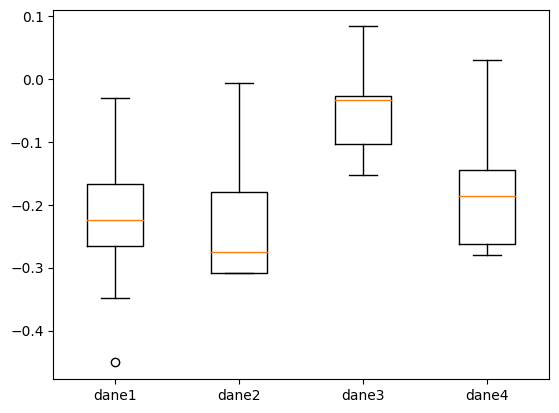

In [211]:
plt.boxplot([array_dropna(tunability1),
             array_dropna(tunability2),
             array_dropna(tunability3),
             array_dropna(tunability4
                          )],
            labels=['dane1', 'dane2', 'dane3', 'dane4'])
plt.show()

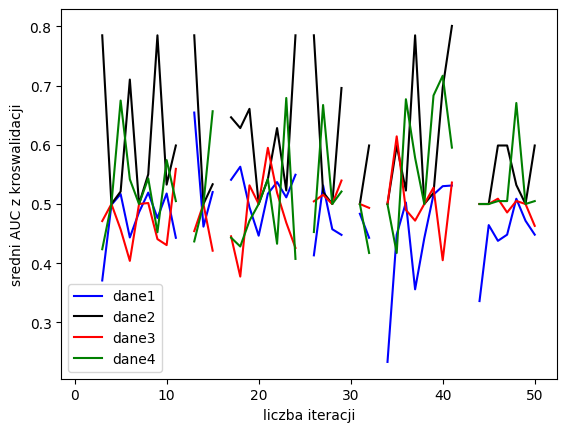

In [200]:
plt.plot(n_iter, scores1, color='blue', label='dane1')
plt.plot(n_iter, scores2, color='black', label='dane2')
plt.plot(n_iter, scores3, color='red', label='dane3')
plt.plot(n_iter, scores4, color='green', label='dane4')
plt.legend()
plt.xlabel("liczba iteracji")
plt.ylabel("sredni AUC z kroswalidacji")
plt.show()

# Tunowalność hiperparametrów dla lasu losowego przy losowaniu punktów metodą RandomizedSearchCV

Sprawdzimy wpływ poszczególnych hiperparametrów algorytmu lasu losowego, porównując auc uzyskane dla defaultowych parametrów biblioteki z wyznaczonymi za pomocą RandomizedSearchCV

In [201]:
param_tunability1,param_tunability2,param_tunability3,param_tunability4=[],[],[],[]
for key in grid_forest.keys():
  dir= {key:tuple(grid_forest[key])}
  rs_forest = RandomizedSearchCV(forest_pipeline, dir, scoring='roc_auc',cv=5,random_state = 2023)
  #dane1
  gs_forest_res = rs_forest.fit(X1, y1).cv_results_
  param_tunability1.append(gs_forest_res['mean_test_score'])
  #dane 2
  gs_forest_res = rs_forest.fit(X2, y2).cv_results_
  param_tunability2.append(gs_forest_res['mean_test_score'])
  #dane 3
  gs_forest_res = rs_forest.fit(X3, y3).cv_results_
  param_tunability3.append(gs_forest_res['mean_test_score'])
  #dane4
  gs_forest_res = rs_forest.fit(X4, y4).cv_results_
  param_tunability4.append(gs_forest_res['mean_test_score'])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages

In [202]:
n_estimators=[]
n_estimators = np.append(n_estimators,[param_tunability1[0]-score1, param_tunability2[0]-score2,
                           param_tunability3[0]-score3,param_tunability4[0]-score4])
max_samples = []
max_samples =  np.append(max_samples,[param_tunability1[1]-score1, param_tunability2[1]-score2,
                           param_tunability3[1]-score3,param_tunability4[1]-score4])
max_features = []
max_features = np.append(max_features,[param_tunability1[2]-score1, param_tunability2[2]-score2,
                           param_tunability3[2]-score3,param_tunability4[2]-score4])
min_samples_leaf =[]
min_samples_leaf = np.append(min_samples_leaf,[param_tunability1[3]-score1, param_tunability2[3]-score2,
                           param_tunability3[3]-score3,param_tunability4[3]-score4])

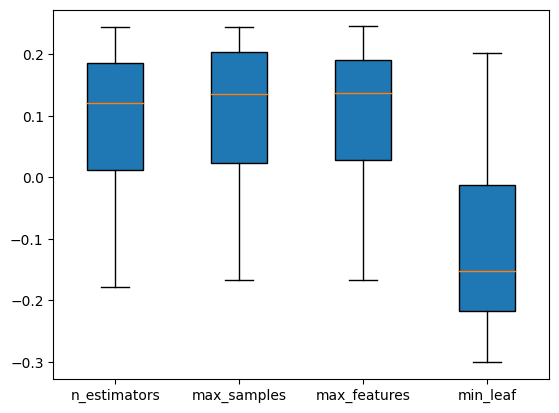

In [203]:
plt.boxplot([array_dropna(n_estimators),
             array_dropna(max_samples),
             array_dropna(max_features),
             array_dropna(min_samples_leaf)],
             labels=['n_estimators', 'max_samples','max_features','min_leaf'],
             patch_artist=True)
plt.show()